In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
dataset=sns.load_dataset('iris')

In [3]:
dataset.shape

(150, 5)

In [4]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
dataset=dataset[dataset['species']!='virginica']

In [6]:
dataset['species'].unique()

array(['setosa', 'versicolor'], dtype=object)

In [7]:
dataset['species'].unique()

array(['setosa', 'versicolor'], dtype=object)

In [8]:
dataset['species']=dataset['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

In [9]:
#features into independent and dependent features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [12]:
print(X_train.shape)
print(X_test.shape)


(70, 4)
(30, 4)


In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
regression=LogisticRegression()

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
parameters={'C':[1,2,3,5,6,7,8,12,34,32,23,45,56,76,89],'penalty':['l1','l2','elasticnet']}
log_regressor=GridSearchCV(regression,parameters,scoring='accuracy',cv=5)
log_regressor.fit(X,y)

/Users/siddanthapusandeep/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/siddanthapusandeep/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/siddanthapusandeep/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/siddanthapusandeep/anaconda3/lib/pyt

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 5, 6, 7, 8, 12, 34, 32, 23, 45, 56, 76,
                               89],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [17]:
print(log_regressor.best_params_)

{'C': 1, 'penalty': 'l2'}


In [18]:
print(log_regressor.best_score_)

1.0


In [19]:
dataset.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.205926,0.812458,0.789608,0.728290
sepal_width,-0.205926,1.000000,-0.602663,-0.570883,-0.690684
petal_length,0.812458,-0.602663,1.000000,0.979322,0.969990
petal_width,0.789608,-0.570883,0.979322,1.000000,0.960307
species,0.728290,-0.690684,0.969990,0.960307,1.000000


/Users/siddanthapusandeep/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


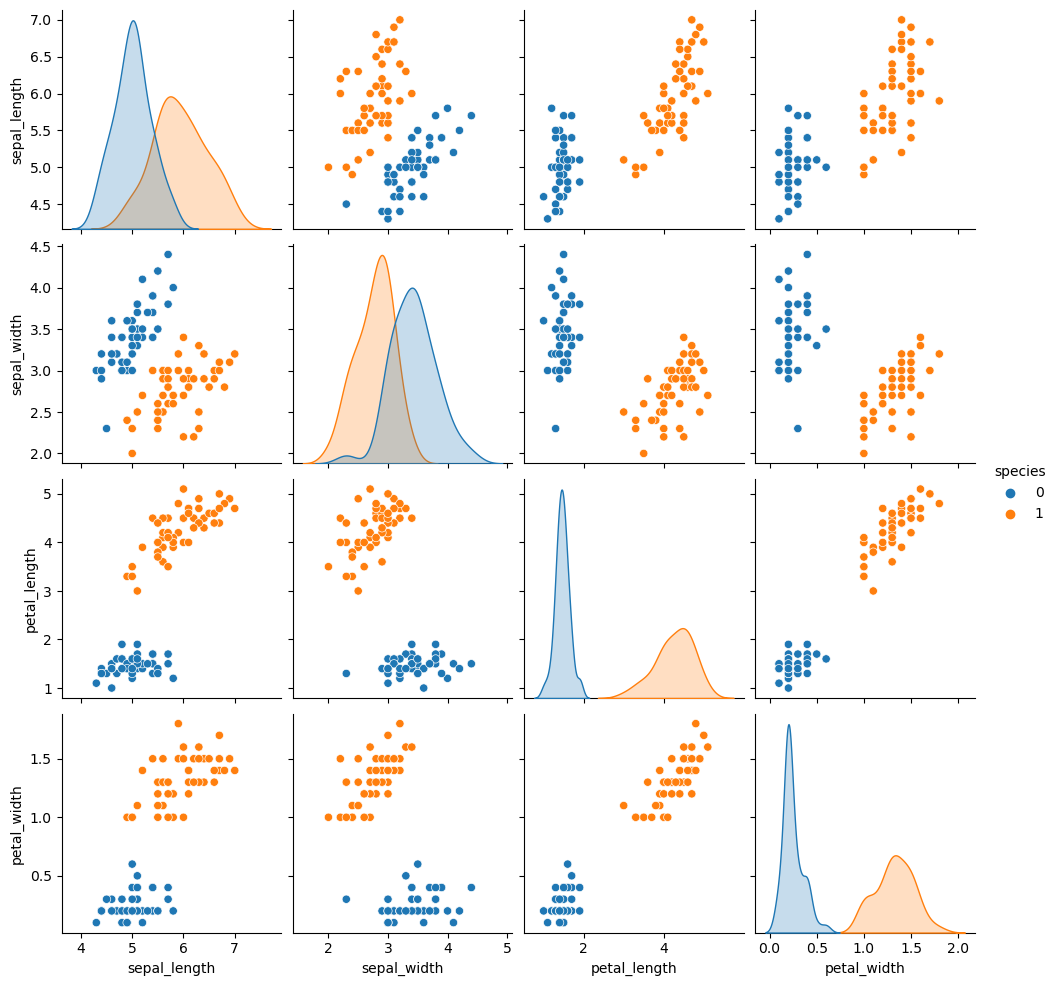

In [20]:
# from the charts we can see that the both groups are clearly separable So, we got 100% Accuarcy

sns.pairplot(dataset,hue='species')

In [21]:
prediction_log=log_regressor.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score

In [23]:
confusion_matrix(y_test,prediction_log)

array([[14,  0],
       [ 0, 16]])

In [24]:
f1_score(y_test,prediction_log)

1.0